In [43]:
import pandas as pd
import polars as pl
import seaborn as sns
import os

# visual packages
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# creating a list of directories we want to concatenate
directories = ['form_714_2021', 'form_714_2022', 'form_714_2023', 'form_714_2024']

In [ ]:
def merge_directory_lists(dirs: list):
    '''
    given a list of directories
    '''
    # master list
    master_list = []

    for directory in dirs:
        temp_list = os.listdir(directory)
        print(temp_list)
        master_list.append(temp_list)

    return [item for row in master_list for item in row]

In [4]:
test_list = merge_directory_lists(dirs=directories)
print(len(test_list))

['Form_714_2021_Arizona_Public_Service_Company_Q4_7_15_2022__4_23_PM_93834.xml', 'Form_714_2021_NorthWestern_Corporation_Q4_4_21_2022__5_09_PM_90300.xml', 'Form_714_2021_Florida_Municipal_Power_Pool_Q4_5_31_2022__11_12_PM_92710.xml', 'Form_714_2021_City_of_Tallahassee_Utilities_Q4_6_17_2022__12_17_PM_93571.xml', 'Form_714_2021_Arizona_Public_Service_Company_Q4_7_29_2022__5_03_PM_94047.xml', 'Form_714_2021_Gridforce_Energy_Management__LLC_Q4_6_1_2022__11_39_AM_92731.xml', 'Form_714_2021_Golden_Spread_Electric_Cooperative__Inc__Q4_5_20_2022__1_48_PM_91472.xml', 'Form_714_2021_Avangrid_Renewables__LLC_Q4_6_2_2022__11_50_AM_92820.xml', 'Form_714_2021_Santee_Cooper_Q4_5_20_2022__10_19_AM_91438.xml', 'Form_714_2021_Southern_Company_Services__Inc__(as_Agent)_Q4_5_31_2022__6_30_PM_92680.xml', 'Form_714_2021_JEA_Q4_5_16_2022__1_47_PM_91029.xml', 'Form_714_2021_Oklahoma_Municipal_Power_Authority_Q4_5_25_2022__4_30_PM_91901.xml', 'Form_714_2021_Public_Service_Company_of_Colorado_Q4_5_12_2022__3_4

Here is a prompt that we are feeding into a QWEN 3 8B Q6 quantized model.. for now not working well so a work in progress...

You are a data processing specialist. Your task is to filter FERC 714 filing lists to remove duplicate submissions, keeping only the most recent filing from each entity.

TASK OVERVIEW:
Filter a list of XML file names to keep only the most recent version of each unique entity's filing.

FILE NAME FORMAT:
Form_714_{YEAR}_{Entity_Name}_Q4_{M}_{D}_{YYYY}__{Time}_{ID}.xml

PROCESSING STEPS:
1. Extract entity name: Text between "Form_714_{YEAR}_" and "_Q4"
2. Extract submission datetime: The M_D_YYYY__H_MM_meridiem segment after "Q4_"
3. Group files by entity name
4. For each entity, keep only the file(s) with the most recent submission datetime
5. If multiple files exist for the same entity on the same date, keep all of them

RULES:
- Compare dates chronologically (not alphabetically)
- Remove older submissions from the same entity
- Preserve all files when entities have same-day multiple submissions
- Return only the filtered list of file names to keep

EXAMPLE 1:
Input:
- Form_714_2023_EntityA_Q4_6_2_2024__10_00_AM_123.xml
- Form_714_2023_EntityA_Q4_6_3_2024__11_00_AM_124.xml

Output 1: Keep only Form_714_2023_EntityA_Q4_6_3_2024__11_00_AM_124.xml (most recent)

EXAMPLE 2:
Input:
- Form_714_2021_EntityB_Q4_6_2_2022__9_00_AM_124.xml
- Form_714_2021_EntitiyB_Q4_6_2_2022__9_00_AM_125.xml

Output 2: Keep both given that they both contain the date time "6_2_2022__9_00_AM"

INPUT LIST TO PROCESS:
['Form_714_2021_Arizona_Public_Service_Company_Q4_7_15_2022__4_23_PM_93834.xml', 'Form_714_2021_NorthWestern_Corporation_Q4_4_21_2022__5_09_PM_90300.xml', 'Form_714_2021_Florida_Municipal_Power_Pool_Q4_5_31_2022__$

EXPECTED OUTPUT FORMAT:
Return the filtered list output with each filename in its own line.

hand grabbed results from the 7 ISOs located at: collected_form_714_files
includes: [x]ERCOT, [x]CAISO, [x]SPP, [x]ISONE, [x]PJM, [x]MISO, and [x]NYISO

In [45]:
def return_dir_files(dir_path: str, file_type="xml"):
    '''
    Given a directory path, return file names contained within of defined f type
    '''
    files = []

    for file in os.listdir(dir_path):
        if file.endswith(f'.{file_type}'):
            files.append(os.path.join(dir_path, file))

    return files

In [46]:
print(return_dir_files(dir_path='collected_form_714_files'))

['collected_form_714_files/Form_714_2022_PJM_Interconnection__L_L_C__Q4_6_12_2023__12_22_PM_112779.xml', 'collected_form_714_files/Form_714_2022_ISO_New_England_Inc__Q4_6_21_2023__9_14_AM_112922.xml', 'collected_form_714_files/Form_714_2023_California_Independent_System_Operator_Corporation_Q4_5_29_2024__5_52_PM_181179.xml', 'collected_form_714_files/Form_714_2023_New_York_Independent_System_Operator__Inc__Q4_5_30_2024__2_36_PM_181309.xml', 'collected_form_714_files/Form_714_2021_Electric_Reliability_Council_of_Texas__Inc__Q4_5_23_2022__2_40_PM_91590.xml', 'collected_form_714_files/Form_714_2023_Electric_Reliability_Council_of_Texas__Inc__Q4_6_7_2024__10_26_AM_181864.xml', 'collected_form_714_files/Form_714_2021_PJM_Interconnection__L_L_C__Q4_5_25_2022__11_46_AM_91852.xml', 'collected_form_714_files/Form_714_2021_ISO_New_England_Inc__Q4_6_1_2022__12_08_PM_92735.xml', 'collected_form_714_files/Form_714_2022_New_York_Independent_System_Operator__Inc__Q4_5_31_2023__2_06_PM_112044.xml', 'c

In [47]:
def return_ferc_forecasts(xml_fpath: str, encoding='windows-1252'):
    '''
    purpose is to return a processed df when provided with topics to grab

    setting encoding as windows-1252 by default assuming filings are processed with 
    windows computers/operating systems
    '''
    df = pd.read_xml(xml_fpath, encoding='windows-1252')
    #print(df.info())

    # checking that all xml files have these columns else, bring to attention incompletes
    required_cols = ['PlanningAreaHourlyDemandAndForecastYear', 'PlanningAreaHourlyDemandAndForecastForecastOfAnnualNetEnergyForLoad', 'PlanningAreaHourlyDemandAndForecastSummerForecast', 'PlanningAreaHourlyDemandAndForecastWinterForecast', 'RespondentLegalName', 'ReportYear', 'ReportPeriod', 'CompanyIdentifier']
    if not all(col in df.columns for col in required_cols):
        return pd.DataFrame()

    # preset list of data columns we will be grabbing
    topics ={
        "forecast_year": 'PlanningAreaHourlyDemandAndForecastYear',
        "ann_net_load": 'PlanningAreaHourlyDemandAndForecastForecastOfAnnualNetEnergyForLoad',
        "summer_forecast": 'PlanningAreaHourlyDemandAndForecastSummerForecast',
        "winter_forecast": 'PlanningAreaHourlyDemandAndForecastWinterForecast',
    }

    # refined topics list
    topics_dict = pd.DataFrame()

    # iterate through list and grab data while converting into float
    for key,value in topics.items():
        temp_df = df[f'{value}'].dropna()

        # this is a list of values we want to convert to integers
        convert_to_ints = ['ann_net_load', 'summer_forecast', 'winter_forecast']
        convert_to_str = ['respondent_name', 'respondent_id']

        if key in convert_to_ints:
            temp_list = list(temp_df.astype(int))

        elif key in convert_to_str:
            temp_list = list(temp_df.astype(str))

        else:
            temp_list = list(pd.to_datetime(temp_df, format="%Y").dt.year)

        # in the case that forecasts do not follow increasing trend, then....
        # sort the list and bring to users attention
        # we assume that all forecast are increasing...
        if temp_list[-1] <= temp_list[0]:
            sorted_temp_list = sorted(temp_list)
            print(f"had to sort: {xml_fpath}! please check data...")
            topics_dict[f'{key}'] = sorted_temp_list
        
        else:
            topics_dict[f'{key}'] = temp_list

    # now we are adding the name of the entity name under a new column
    topics_dict['respondent_name'] = list(df['RespondentLegalName'].dropna())[0]

    # also adding report year and period and identification code
    topics_dict['report_year'] = list(df['ReportYear'].dropna())[0]
    topics_dict['report_period'] = list(df['ReportPeriod'].dropna())[0]
    topics_dict['entity_id'] = list(df['CompanyIdentifier'].dropna())[0]
    topics_dict['entity_id'] = topics_dict['entity_id'].astype(str)

    return topics_dict

In [48]:
# testing to see if this works with 1 example
print(return_ferc_forecasts(xml_fpath='collected_form_714_files/Form_714_2021_California_Independent_System_Operator_Corporation_Q4_6_6_2022__4_18_PM_93021.xml'))

    forecast_year  ann_net_load  summer_forecast  winter_forecast  \
0            2022     216452328            46319            32903   
1            2023     218507478            46727            33412   
2            2024     220729127            47325            33895   
3            2025     222492779            47749            34250   
4            2026     224295403            48190            34636   
5            2027     226164375            48770            35060   
6            2028     227537195            49269            35432   
7            2029     229115975            49732            35865   
8            2030     230700240            50272            36192   
9            2031     232579293            50950            36662   
10           2032     234040141            51444            37041   

                                      respondent_name  report_year  \
0   California Independent System Operator Corpora...       2021.0   
1   California Independent Syst

In [49]:
# function to combine dataframes
def combine_ferc_files(xml_fpaths: list):

    # master df where we will aggregate all xml datasets
    master_df = pd.DataFrame()

    for xml_fpath in xml_fpaths:
        temp_df = return_ferc_forecasts(xml_fpath=xml_fpath)
        master_df = pd.concat([master_df, temp_df])

    return master_df

We have set up the files needed to parse through xmls, grab data and then return as a df
Let's set up code to run this now

In [69]:
df = combine_ferc_files(xml_fpaths=return_dir_files(dir_path='collected_form_714_files'))

had to sort: collected_form_714_files/Form_714_2023_PJM_Interconnection__L_L_C__Q4_5_31_2024__11_13_AM_181436.xml! please check data...


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 9
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   forecast_year    214 non-null    int64  
 1   ann_net_load     214 non-null    int64  
 2   summer_forecast  214 non-null    int64  
 3   winter_forecast  214 non-null    int64  
 4   respondent_name  214 non-null    object 
 5   report_year      214 non-null    float64
 6   report_period    214 non-null    object 
 7   entity_id        214 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 15.0+ KB


In [91]:
def entity_fgrid(dataset: object, choose_col='respondent_name', choose_hue='report_year', choose_cwrap=3, 
                 choose_fcast='ann_net_load'):
    '''
    Given a dataset return 3 facet grids related to forecast data
    '''
    if choose_fcast == 'ann_net_load':
        electron_units = 'MWh'
    
    else: 
        electron_units = 'MW'

    plt.figure(figsize=[24,2])

    g = sns.FacetGrid(data=df, col=choose_col, hue=choose_hue, col_wrap=choose_cwrap)

    g.map(sns.lineplot, 'forecast_year', choose_fcast)
    g.set_titles(fontsize=8, col_template='{col_name}')
    g.set_axis_labels('', f'{choose_fcast}_{electron_units}')
    g.fig.suptitle(f'FERC 714 10 Year {choose_fcast} Forecasts', fontsize=10, y=1.03)

    g.add_legend()
    plt.tight_layout()
    plt.show()


before showing graphs, please note that upon generating a plot forecast, 
CAISO 2023 ANN NET LOAD forecast was missing 000 and this was hand edited. 

2023 CAISO FERC FORM 714

<Figure size 2400x200 with 0 Axes>

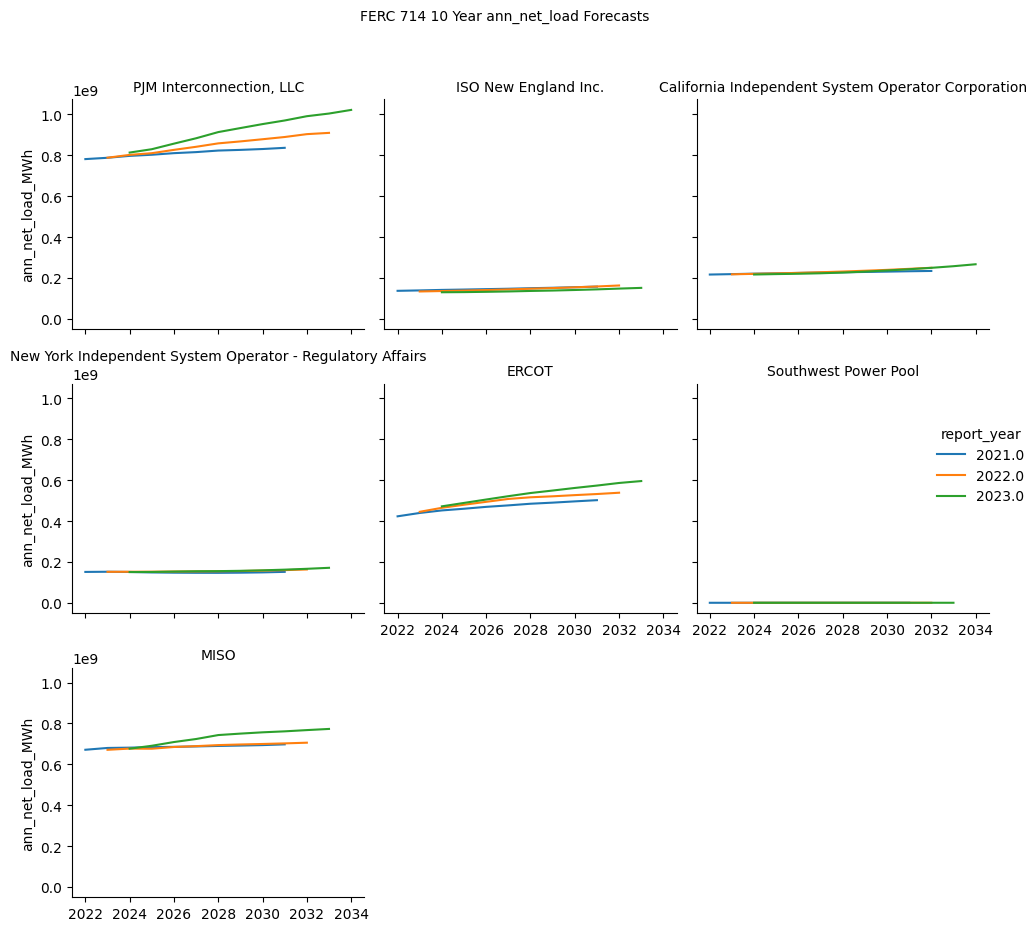

<Figure size 2400x200 with 0 Axes>

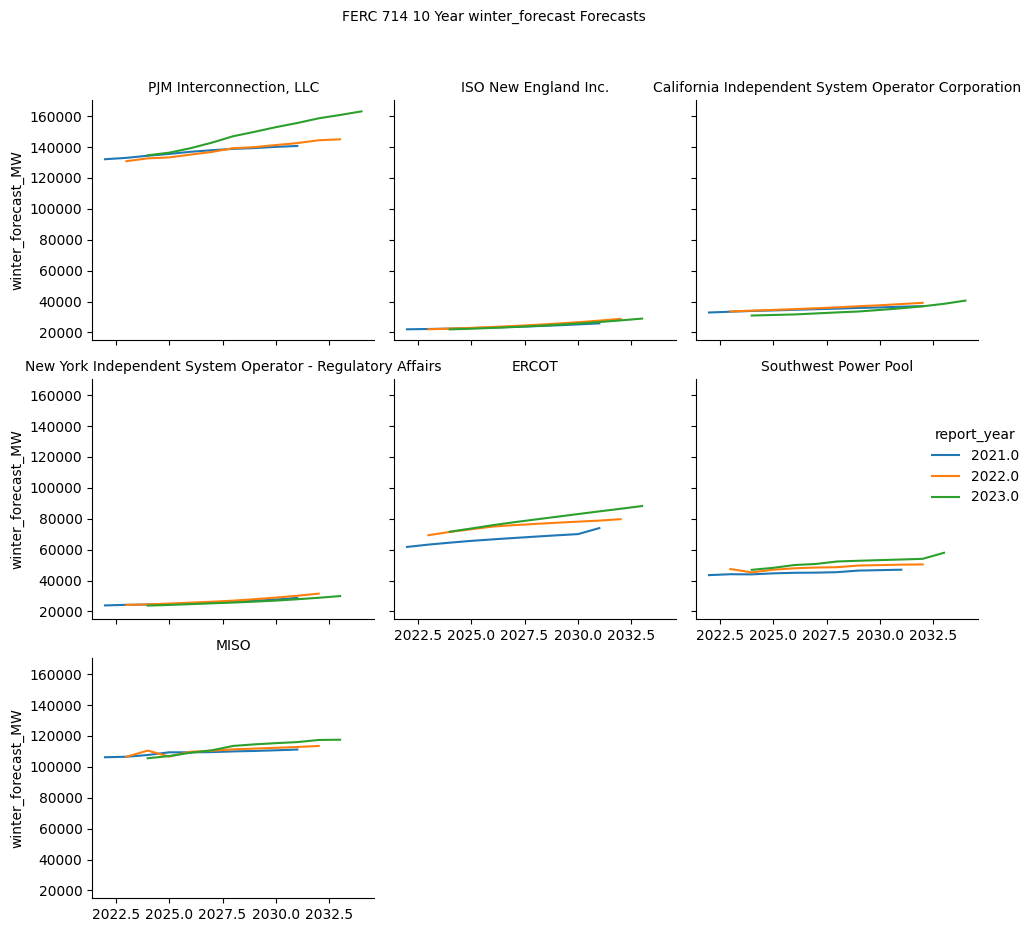

<Figure size 2400x200 with 0 Axes>

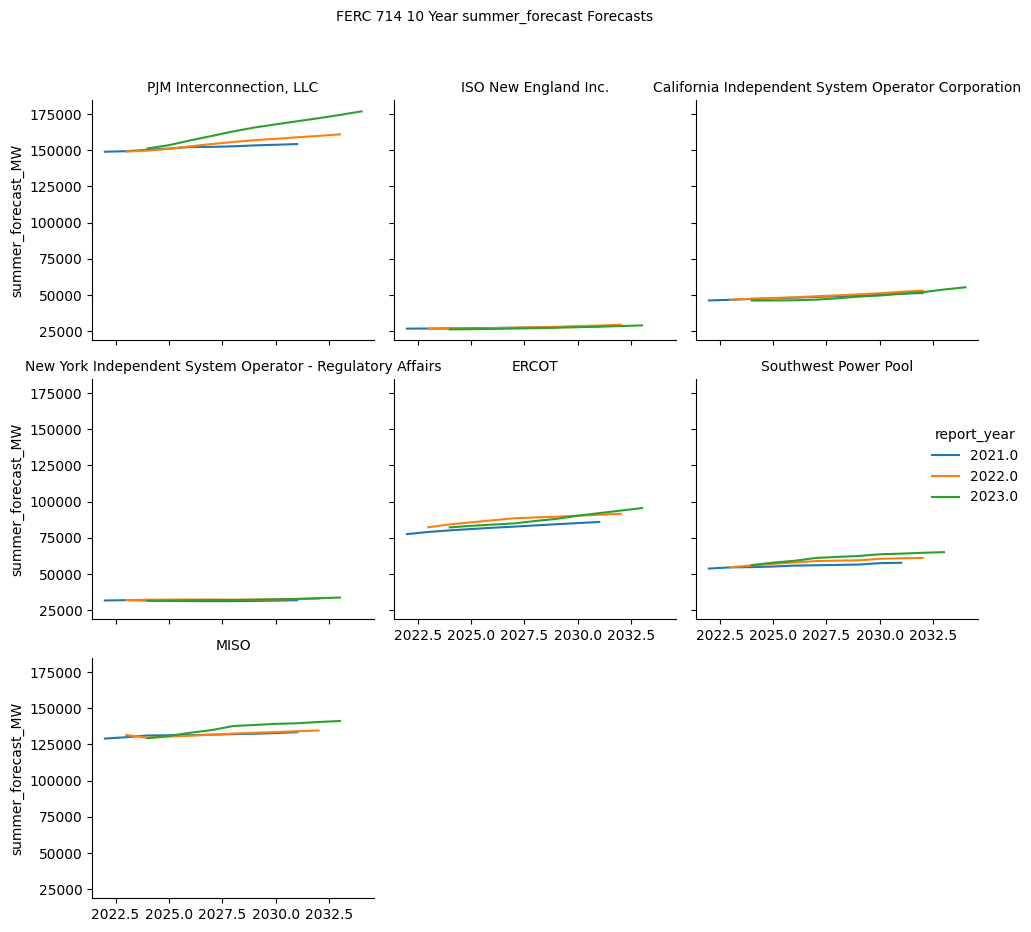

In [92]:
entity_fgrid(dataset=df, choose_fcast='ann_net_load')
entity_fgrid(dataset=df, choose_fcast='winter_forecast')
entity_fgrid(dataset=df, choose_fcast='summer_forecast')